# Credit risk modeling in Python

## What is credit risk?

Credit risk is the possiblity that the borrowers will not be able to make the timely payments and will default on their debt or loans. It refers to the possibility that a lender will not get the interest or principle due to them on time. 



## Credit Risk Modeling: Understanding its Importance

Financial organizations naturally concern themselves with a borrower's ability to make timely payments. This concern has given rise to credit risk modeling technology, which plays a crucial role in determining whether loan applications should be approved.

**But what exactly is credit risk modeling technology?**

At its core, credit risk modeling involves predicting a person's credit risk by utilizing various information from their application or system. This practice revolves around applying data models to assess two critical factors. The first factor is the likelihood of the borrower defaulting on the loan, while the second factor focuses on evaluating the potential financial impact on the lender in case of default.

#### Machine Learning models have helped these companies in improving the accuracy of their credit risk analysis by giving a scientific technique for predicting potential debtors.

##### The objective of this article is to build a model to predict probability of person defaulting a loan. The following steps will be followed in building the model.

- Data Preprocessing and data prepration
- Features Engineering and Features selection
- Model Developement and Model Evaluations

Data links:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
![SNOWFALL](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*6KcRkfNyIhpHbZiO.png)



## About the data

The data was taken from Kaggle [here](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

## import the libraries and reading the data

In [1]:
%pip install seaborn==0.11.0
%pip install imblearn
#%pip install collections

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\twang\Anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\twang\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the data 
credit_risk= pd.read_csv("UCI_credit_card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Explanation of the Data**

- **LIMIT_BAL**: Amount of the given credit in NT dollars, including both individual consumer credit and supplementary family credit.

- **SEX**: Gender (1 = male; 2 = female).

- **EDUCATION**: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others, 0, 5, 6 = unknown).

- **MARRIAGE**: Marital status (1 = married; 2 = single; 3 = divorce; 0 = others).

- **AGE**: Age in years.

- **PAY0-PAY6**: History of past payment. This tracks the past monthly payment records from April to September 2005, where PAY0 represents the repayment status in September 2005, PAY1 represents August 2005, and so on. The measurement scale for the repayment status is as follows:
    - -2: No consumption.
    - -1: Paid in full.
    - 0: The use of revolving credit.
    - 1: Payment delay for one month.
    - 2: Payment delay for two months.
    - ...
    - 8: Payment delay for eight months.
    - 9: Payment delay for nine months and above.

- **BILL_AMT1-BILL_AMT6**: Amount of bill statement in NT dollars. BILL_AMT1 represents the bill statement amount in September 2005, BILL_AMT2 in August 2005, and so on until April 2005.

- **PAY_AMT1-PAY_AMT2**: Amount of previous payment in NT dollars. PAY_AMT1 represents the amount paid in September 2005, PAY_AMT2 in August 2005, and so on until April 2005.


## Data preparation and pre-processing

Good data preparation and pre-processing 
1. is crucial for improving the accuracy of the credit risk modeling.
2. can transfer the attributes into the language which the model can understand. 

In [4]:
### Here I am doing to copy the original data in data frame called df.
df= credit_risk.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# remove the id because it doesn't represent the meaning
#axis=1 -- column removal and inplcae= True --means change in the original data
#axis=0 -- row but we don't need this for this time. 
df.drop(["ID"], axis=1, inplace= True)


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#check if there is any nulll in the data
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

OK, there is no null in the data, very good. 

### Anlysis for the column education

**EDUCATION**: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others, 0, 5, 6 = unknown)

In [9]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Let's firstly put 0, 1, 5, 6 into the same category

In [10]:
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

### Analysis of column "Marriage"
Marital status (1=married, 2=single, 3=others)

In [11]:
# see the values 
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
# Here I am going to map 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

### Analysis of column "PAY_0 to PAY_6"
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


In [13]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

## Data visualization

C:\Users\twang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

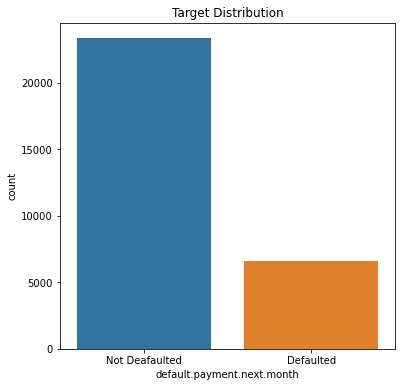

In [14]:
# Lets visualize the target column "default.payment.next.month"
plt.figure(figsize=(6,6))
#plt.hist(df['default.payment.next.month'])
# or 
sns.countplot(df['default.payment.next.month'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

Text(0.5, 1.0, 'Age distribution')

<Figure size 432x432 with 0 Axes>

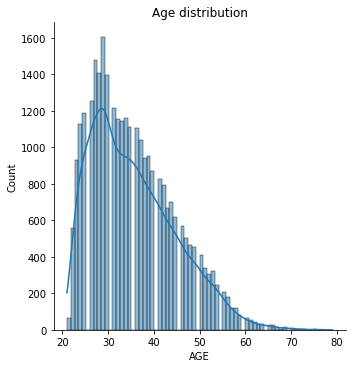

In [15]:
# age visualzation
# with age column
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

C:\Users\twang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Distribution')

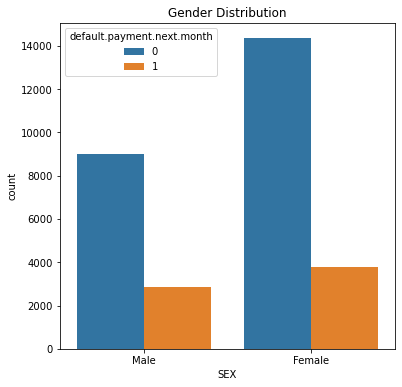

In [16]:
# With sex columns 
#Gender (1=male, 2=female)
plt.figure(figsize=(6,6))
sns.countplot('SEX',hue='default.payment.next.month',data=df)
plt.xticks([0,1], labels=["Male", "Female"])
#plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")

C:\Users\twang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MARRIAGE Distribution')

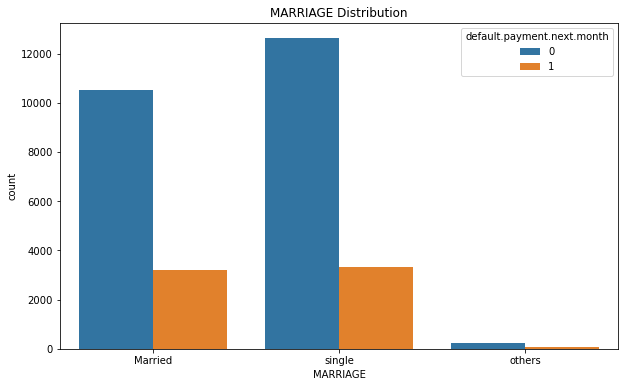

In [17]:
# With MARRIAGE columns 
#
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE',hue='default.payment.next.month',data=df)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

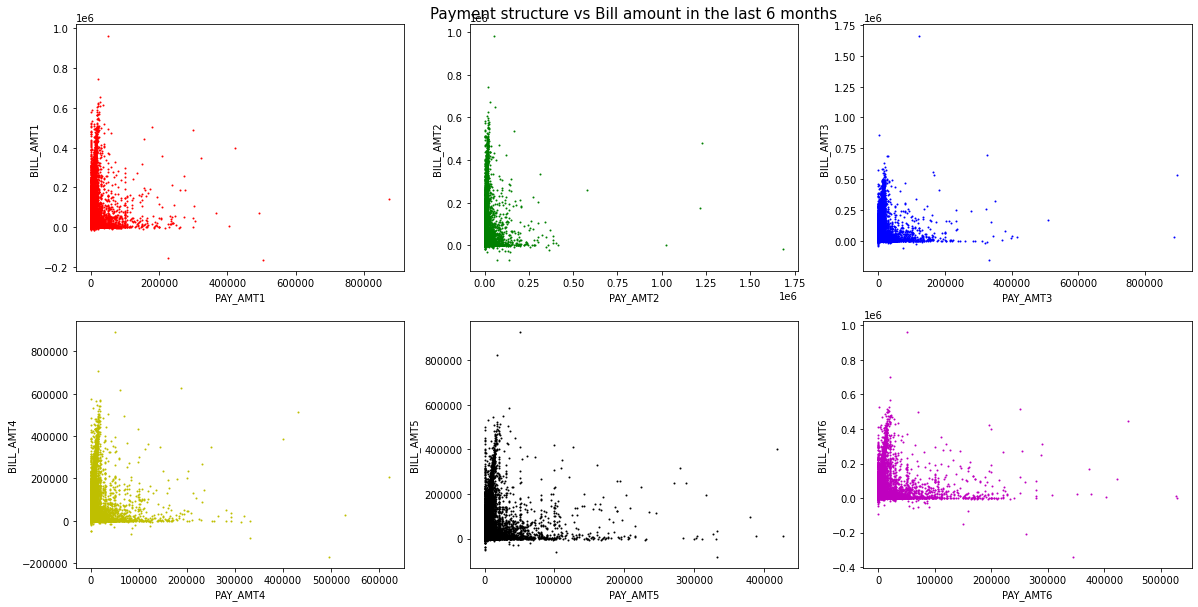

In [18]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

## Creating Independent features and depened features
Independent variables (also referred to as Features) are the input for a process that is being analyzed. Dependent variables are the output of the process.

In [19]:
#Independant features 
X = df.drop(["default.payment.next.month"], axis=1)

#Dependant feature - our output
y = df["default.payment.next.month"]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Scaling the features
- Scalling the features can make sure that our model won't be biased towards the higher range of values. To make all features in smae range. 
- here we are suing the standardScaler



In [20]:
# remove the mean and std inside the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

### Train test split
![train_test_split_image](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pr4nVYDtuNNq4Rck-wa9iw.png)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

## Balancing the data
- since our dataset was imbalace, so used SMOTE technique to make it balanced.
- For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement [2]. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.
- Through the `value_counts()` and visualization we did in the previous secction, we can tell that the data is inbalanced in each category. 

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# summarize class distribution
print("Before oversampling: ",Counter(y_train))


# Define oversampling strategy
SMOTE= SMOTE()

#fit and apply transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))


Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


## Building Model
- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Support vector machine classifier

We will try to analyse them and test the accuracy level

#### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit= logit.predict(X_test)

- Accuracy: the proportion of the total number of correct predictions.
- Positive Predictive Value or Precision: the proportion of positive cases that were correctly identified.
- Negative Predictive Value: the proportion of negative cases that were correctly identified.
- Sensitivity or Recall: the proportion of actual positive cases which are correctly identified.
- Specificity: the proportion of actual negative cases which are correctly identified.

![confusion matrix_image](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*HH0OTfLcj2eIy3U_.jpg)

#### Evaluation metrices

In [24]:
%pip install --upgrade scikit-learn

You should consider upgrading via the 'C:\Users\twang\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, PrecisionRecallDisplay

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6881666666666667
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



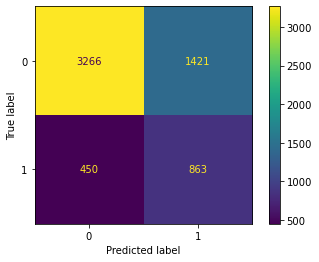

In [33]:
# plot the confusion matrix
cm = confusion_matrix(y_test, pred_logit, labels=logit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit.classes_)
disp.plot()
plt.show()

In [34]:
print(logit.classes_)

[0 1]


#### Random forest

1. random samples were taken from some samples
2. Individual decision trees were built from this
3. each tree will generate an output
4. Final output is considered based on Majority voteing or averaging
5. Then we got a fina tree


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

##### Evaluate the model


In [36]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of logit model is: 0.7933333333333333
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.46      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



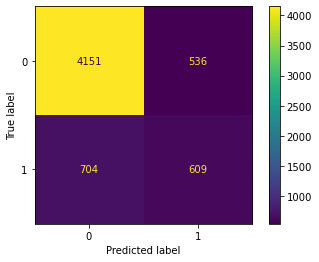

In [37]:
# plot the confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot()
plt.show()

#### XGBoost classifier
each decision tree has a weight for it. and try to correct the error created by the previous tree

In [41]:
%pip install xgboost
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

     ---------------------------------------- 70.9/70.9 MB 9.8 MB/s eta 0:00:00



You should consider upgrading via the 'C:\Users\twang\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

In [43]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.8108333333333333
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.60      0.39      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



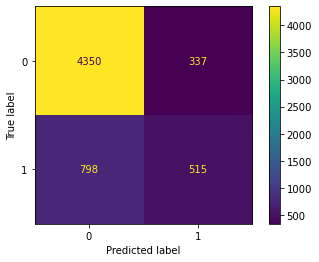

In [44]:
# plot the confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_predict, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

In [46]:
##### Hyperparameter tunning

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [47]:
# Finding the best estimators
random_search.best_estimator_
# Finding the best param
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [50]:
predict_random_search = random_search.predict(X_test)
print("The accuracy of logit model is:", accuracy_score(y_test, predict_random_search))
print(classification_report(y_test,predict_random_search ))

The accuracy of logit model is: 0.8075
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.59      0.39      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [52]:
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.2,
                                  learning_rate=0.15,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  subsample=0.9, 
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
y_pred= classifier.predict(X_test)

In [54]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.8106666666666666
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.60      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [56]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\twang\Anaconda3\lib\site-packages\xgboost\sklearn.p

## Conclusion
We've tested with different models to predict the credit risk and try to play with they hyperparameter. And the model accuracy can be up to 80%

### reference 
[click here](https://medium.com/mlearning-ai/credit-risk-modelling-in-python-7b21a0b794b1)